In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import timedelta


In [5]:

stock = 'HDFCBANK.NS'

ticker = yf.Ticker(stock)

# 1️ Get the earliest available trading date (acts as listing date)
hist = ticker.history(period="max")
start_date = hist.index.min().date()

#  Define 10 years from listing
ten_years_later = start_date + timedelta(days=365 * 10)

#  Get latest trading date
latest_date = hist.index.max().date()

#  Choose end date (earliest of the two)
end_date = min(ten_years_later, latest_date)

#  Download final data
data = yf.download(
    stock,
    start=start_date,
    end=end_date
)


C:\Users\vedi0\AppData\Local\Temp\ipykernel_9816\2418652244.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace = True)


In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
0,1996-01-01,1.149970,1.169265,1.128746,1.169265,700000
1,1996-01-02,1.148041,1.167336,1.138394,1.149971,824000
2,1996-01-03,1.151900,1.155759,1.138394,1.148041,568000
3,1996-01-04,1.144182,1.149970,1.134535,1.151900,564000
4,1996-01-05,1.142253,1.149971,1.138394,1.144182,378000
...,...,...,...,...,...,...
2593,2005-12-22,31.798527,32.006333,31.063711,31.277943,5801320
2594,2005-12-23,30.862331,32.070602,30.635245,31.749254,4688620
2595,2005-12-26,30.352459,31.055145,29.992550,30.763788,4794700


In [8]:
ma_100_days = data.Close.rolling(100).mean()


In [9]:
data.dropna(inplace= True)

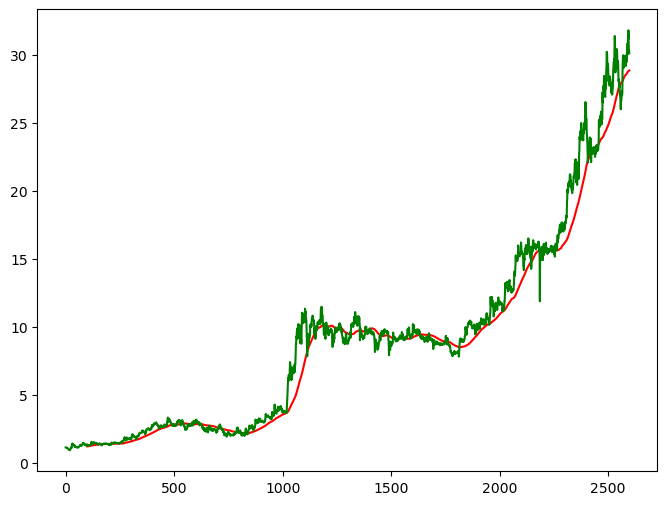

In [10]:
plt.figure(figsize =(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()


In [11]:
ma_200_days = data.Close.rolling(200).mean()

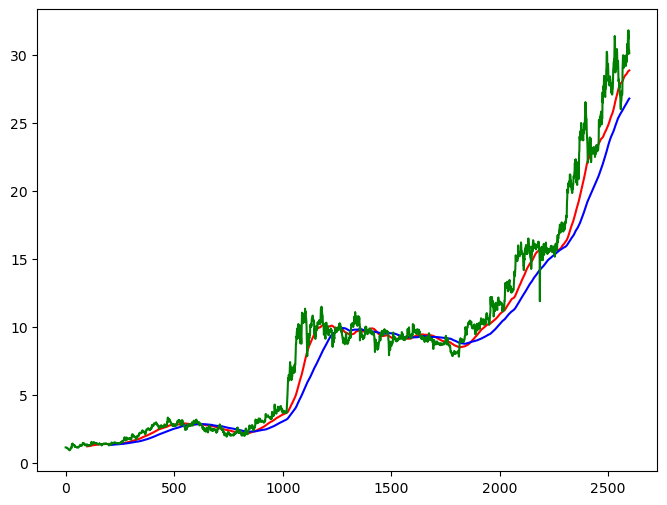

In [12]:
plt.figure(figsize =(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()


In [13]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0], data_test.shape[0]

(2078, 520)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_scale = scaler.fit_transform(data_train)

In [17]:
x=[]
y=[]
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [18]:
x,y = np.array(x), np.array(y)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

In [20]:
model = Sequential()

# 1. Define the input shape explicitly here
model.add(Input(shape=(x.shape[1], 1)))

# 2. First LSTM layer (removed input_shape argument)
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# 3. Subsequent layers remain the same
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0414
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0090
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0071
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0073
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0069
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - loss: 0.0059
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 156ms/step - loss: 0.0059
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 138ms/step - loss: 0.0054
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0051
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - loss: 0.0053
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0047
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - loss: 0.0046
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0046
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0044
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 151ms/step - los

In [23]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [24]:
past_100_days = data_train.tail(100)

In [25]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [26]:
data_test_scale = scaler.fit_transform(data_test)

In [27]:
x=[]
y=[]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)  

In [28]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y= y*scale

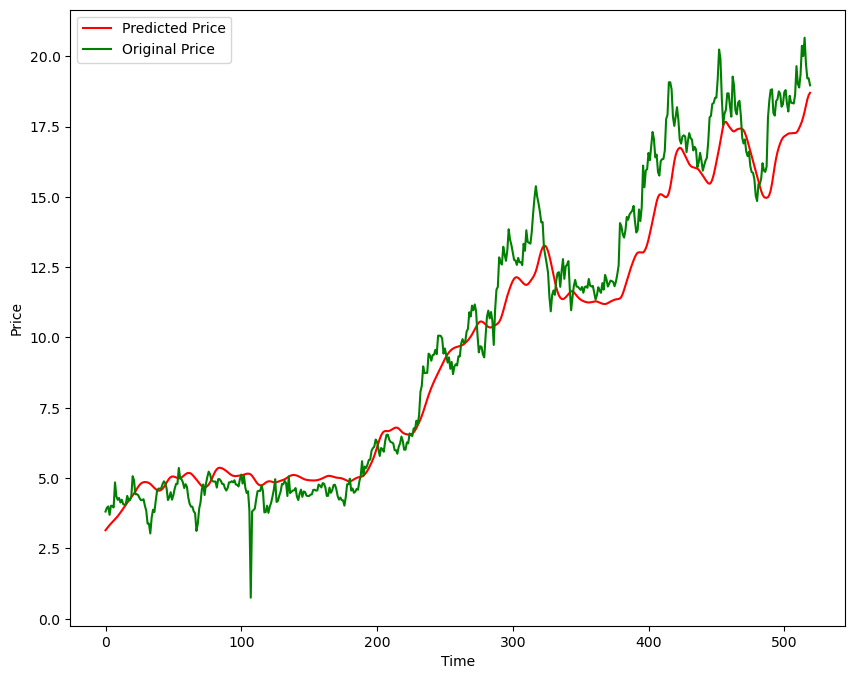

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save("Stock Preictions Model.keras")